# Especialización en Ciencia de datos
# Módulo Inferencia Estadística.



## 1. Introducción.

En DS, recolectamos y evaluamos datos para obtener conclusiones, aplicando para ello diversas técnicas de analisis. Algunas de estas conclusiones o descubrimientos pueden describirse fácilmente usando tablas y gráficos, lo que conocemos como **estadística descriptiva**. En muchos otros casos, necesitamos explorar una cantidad o variable *no observada* a partir de los datos disponibles, y estimar ciertos parámetros de una población a partir de una muestra representativa. En este caso, recurrimos a la **inferencia estadística**.



El proceso de inferencia estadística concierne al desarrollo de procesos, métodos y teoremas que nos permiten extraer significado e información de data generada por procesos estocásticos (aleatorios).



Tenemos una muestra de una población, y podemos calcular estadísticas descriptivas para ellas. ¿Pero son representativas de la población completa?
No podemos predecir valores absolutos para otras muestras o mediciones, pero podemos hablar en el lenguaje de probabilidades.

El objetivo de la inferencia estadística, es obtener conclusiones probabilísticas sobre los resultados que esperamos si volvemos  tomar los mismos datos.





In [1]:
import pandas as pd # importamos el modulo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # importando scipy.stats


In [2]:
np.random.seed(2131986) # para poder replicar el random

%matplotlib inline

## Probabilidad - Ley de los grandes números

La ley de grandes números, que junto con el Teorema del límite central, constituyen los cimientos de la teoría de probabilidad. Podemos formular esta ley de la siguiente manera: si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son independientes la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá con probabilidad 1 a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento. Lo que esta ley nos enseña, es que la probabilidad subyacente de cualquier suceso aleatorio puede ser aprendido por medio de la experimentación, simplemente tendríamos que repetirlo una cantidad suficientemente grande de veces!. Un error que la gente suele cometer y asociar a esta ley, es la idea de que un evento tiene más posibilidades de ocurrir porque ha o no ha ocurrido recientemente. Esta idea de que las chances de un evento con una probabilidad fija, aumentan o disminuyen dependiendo de las ocurrencias recientes del evento, es un error que se conoce bajo el nombre de la falacia del apostador.

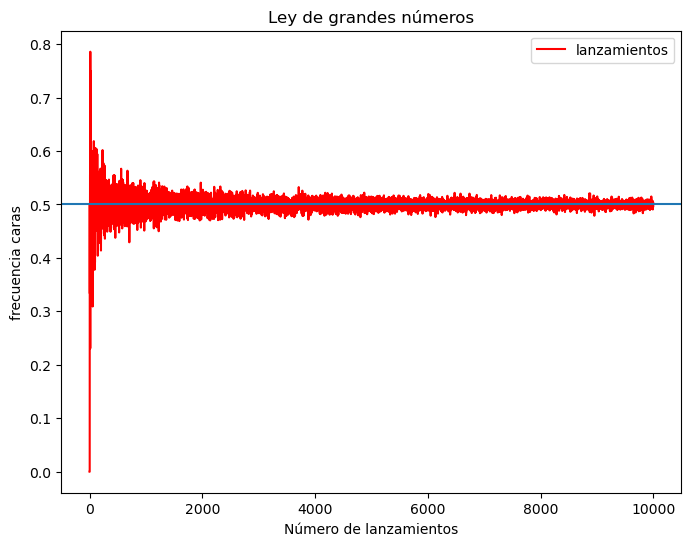

In [3]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

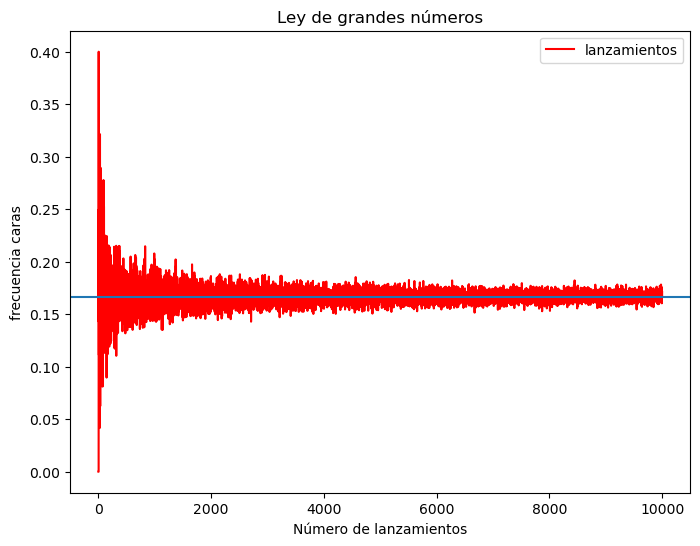

In [4]:
# moneda p=1/6 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6]) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

## Probabilidad

La paradoja del cumpleaños es un problema muy conocido en el campo de la teoría de probabilidad. Plantea las siguientes interesantes preguntas: ¿Cuál es la probabilidad de que, en un grupo de personas elegidas al azar, al menos dos de ellas habrán nacido el mismo día del año? ¿Cuántas personas son necesarias para asegurar una probabilidad mayor al 50%?. Excluyendo el 29 de febrero de nuestros cálculos y asumiendo que los restantes 365 días de posibles cumpleaños son igualmente probables, nos sorprendería darnos cuenta de que, en un grupo de sólo 23 personas, la probabilidad de que dos personas compartan la misma fecha de cumpleaños es mayor al 50%!.

Esto ya nos dice algo respecto a nuestras chances en la apuesta con nuestro amigo, pero de todas formas calculemos la probabilidad en un grupo de 50 personas. Calcular la probabilidad de un cumpleaños duplicado puede parecer una tarea desalentadora. Pero ¿qué pasa con calcular la probabilidad de que no haya un cumpleaños duplicado? Esto es realmente una tarea más fácil. Especialmente si simplificamos el problema a un grupo muy pequeño. Supongamos que el grupo sólo tiene una persona, en ese caso, hay una probabilidad del 100% que esta persona no comparte un cumpleaños puesto que no hay nadie más quien compartir. Pero ahora podemos añadir una segunda persona al grupo. ¿Cuáles son las posibilidades de que tenga un cumpleaños diferente de esa persona? De hecho esto es bastante fácil, hay 364 otros días en el año, así que las posibilidades son 364/365. ¿Qué tal si agregamos una tercera persona al grupo? Ahora hay 363/365 días. Para obtener la probabilidad general de que no hay cumpleaños compartidos simplemente multiplicamos las probabilidades individuales. Si utilizamos este procedimiento, con la ayuda de Python podemos calcular fácilmente las probabilidades de un cumpleaños compartido en un grupo de 50 personas.

In [11]:

# Ejemplo situación 2 La coincidencia de cumpleaños
prob = 1.0
asistentes = 61

for i in range(asistentes):
    prob = prob * (365-i)/365 #i=1 364/365

print("Probabilidad de que compartan una misma fecha de cumpleaños es {0:.2f}"
      .format(1 - prob))

Probabilidad de que compartan una misma fecha de cumpleaños es 1.00


### Otro ejemplo

Este problema, más conocido con el nombre de Monty Hall, también es un problema muy popular dentro de la teoría de probabilidad; y se destaca por su solución que a simple vista parece totalmente anti-intuitiva. Intuitivamente, es bastante sencillo que nuestra elección original (cuando hay tres puertas para elegir) tiene una probabilidad de 1/3 de ganar el concurso. Las cosas sin embargo se complican, cuando se descarta una puerta. Muchos dirían que ahora tenemos una probabilidad de 1/2 de ganar, seleccionando cualquiera de las dos puertas; pero este no es el caso. Un aspecto crítico del problema es darse cuenta de que la elección de la puerta a descartar por el presentador, no es una decisión al azar. El presentador puede descartar una puerta porque él sabe (a) qué puerta hemos seleccionado y (b) qué puerta tiene la ferrari. De hecho, en muchos casos, el presentador debe quitar una puerta específica. Por ejemplo, si seleccionamos la puerta 1 y el premio está detrás de la puerta 3, el presentador no tiene otra opción que retirar la puerta 2. Es decir, que la elección de la puerta a descartar está condicionada tanto por la puerta con el premio como por la puerta que seleccionamos inicialmente. Este hecho, cambia totalmente la naturaleza del juego, y hace que las probabilidades de ganar sean 2/3 si cambiamos de puerta!.



In [13]:
# Ejemplo situación 2 ¿Que puerta elegir? (el problema Monty Hall)
def elegir_puerta():
    """
    Función para elegir una puerta. Devuelve 1, 2, o 3 en forma aleatoria.
    """
    return np.random.randint(1,4)

class MontyHall:
    """
    Clase para modelar el problema de Monty Hall.
    """
    def __init__(self):
        """
        Crea la instancia del problema. 
        """
        # Elige una puerta en forma aleatoria.
        self.puerta_ganadora = elegir_puerta()
        # variables para la puerta elegida y la puerta descartada
        self.puerta_elegida = None
        self.puerta_descartada = None
 
    def selecciona_puerta(self):
        """
        Selecciona la puerta del concursante en forma aleatoria.
        """
        self.puerta_elegida = elegir_puerta()
 
    def descarta_puerta(self):
        """
        Con este método el presentador descarta una de la puertas.
        """
        # elegir puerta en forma aleatoria .
        d = elegir_puerta()
        # Si es al puerta ganadora o la del concursante, volver a elegir.
        while d == self.puerta_ganadora or d == self.puerta_elegida:
            d = elegir_puerta()
        # Asignar el valor a puerta_descartada.
        self.puerta_descartada = d
 
    def cambiar_puerta(self):
        """
        Cambia la puerta del concursante una vez que se elimino una puerta.
        """
        # 1+2+3=6. Solo existe una puerta para elegir.
        self.puerta_elegida = 6 - self.puerta_elegida - self.puerta_descartada
 
    def gana_concursante(self):
        """
        Determina si el concursante gana. 
        Devuelve True si gana, False si pierde.
        """
        return self.puerta_elegida == self.puerta_ganadora
            
 
    def jugar(self, cambiar=True):
        """
        Una vez que la clase se inicio, jugar el concurso.
 
        'cambiar' determina si el concursante cambia su elección.
        """
        # El concursante elige una puerta.
        self.selecciona_puerta()
        # El presentador elimina una puerta.
        self.descarta_puerta()
        # El concursante cambia su elección.
        if cambiar:
            self.cambiar_puerta()
        # Determinar si el concursante ha ganado.
        return self.gana_concursante()

In [14]:
# Ahora, jugamos el concurso. primero nos vamos a quedar con nuestra elección
# inicial. Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=False):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)
 
print("\n10.000 concursos sin cambiar de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} porcentaje de victorias".format(porc_gana))



10.000 concursos sin cambiar de puerta:
  gana: 3300 concursos
  pierde: 6700 concursos
  probabilidad: 33.00 procentaje de victorias


In [15]:
# Ahora, jugamos el concurso siempre cambiando la elección inicial
# Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=True):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)
 
print("\n10.000 concursos cambiando de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} porcentaje de victorias".format(porc_gana))


10.000 concursos cambiando de puerta:
  gana: 6564 concursos
  pierde: 3436 concursos
  probabilidad: 65.64 procentaje de victorias


Como esta simulación lo demuestra, si utilizamos la estrategia de siempre cambiar de puerta, podemos ganar el concurso un 66% de las veces; mientras que si nos quedamos con nuestra elección inicial, solo ganaríamos el 33% de las veces.

## Probabilidad condicional

Supongamos que tenemos dos monedas idénticas y perfectamente balanceadas. Si se lanza cada moneda una vez, encuentre:

a) La probabilidad de que ambas monedas muestren cara, dado que la primera muestra cara.

b) La probabilidad de que ambas monedas muestren cara, dado que al menos una de ellas muestra cara

In [17]:
import numpy as np
#inciso a

#Se generan varias repeticiones del experimento
n = int(1e6)
resultados = np.random.choice(['cara','cruz'], size = (n,2))
resultados


array([['cara', 'cruz'],
       ['cruz', 'cara'],
       ['cara', 'cruz'],
       ...,
       ['cara', 'cruz'],
       ['cruz', 'cruz'],
       ['cruz', 'cara']], dtype='<U4')

In [19]:
#Se obtienen los experimentos en los cuales la primera moneda es cara
condicional = resultados[resultados[:,0] == 'cara']
condicional


array([['cara', 'cruz'],
       ['cara', 'cruz'],
       ['cara', 'cara'],
       ...,
       ['cara', 'cruz'],
       ['cara', 'cruz'],
       ['cara', 'cruz']], dtype='<U4')

In [21]:
#Se obtienen los experimentos en donde las dos monedas son cara
ambas_cara = resultados[np.logical_and(resultados[:,0] == 'cara',
                                      resultados[:,1] == 'cara')]
ambas_cara

array([['cara', 'cara'],
       ['cara', 'cara'],
       ['cara', 'cara'],
       ...,
       ['cara', 'cara'],
       ['cara', 'cara'],
       ['cara', 'cara']], dtype='<U4')

In [22]:
#Calcula la probabilidad condicional
proba = ambas_cara.shape[0] / condicional.shape[0] # P(cara2/cara1)=P(cara1 interseccion cara2)/p(cara1)
print('La probabilidad condicional es', round(proba,2))

La probabilidad condicional es 0.5


In [24]:
# inciso b
#Se obtienen los experimentos en los cuales al menos una moneda es cara
aux = np.logical_or(resultados[:,0] == 'cara',
                                      resultados[:,1] == 'cara')
aux

array([ True,  True,  True, ...,  True, False,  True])

In [25]:
condicional = resultados[aux]

condicional

array([['cara', 'cruz'],
       ['cruz', 'cara'],
       ['cara', 'cruz'],
       ...,
       ['cruz', 'cara'],
       ['cara', 'cruz'],
       ['cruz', 'cara']], dtype='<U4')

In [26]:
#Calcula la probabilidad condicional
proba = ambas_cara.shape[0] / condicional.shape[0]
print('La probabilidad condicional es', round(proba,2))

La probabilidad condicional es 0.33
